**Group**

Zohaib Khan SP25-RAI-023

Muhammad Yaseen SP25-RAI-014



Paper Selection:

Two Papers have been shortlisted

1st Paper(Run Scenrios on this)

Paper Link: https://www.nature.com/articles/s41598-024-74656-2

DataSet Link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease



2nd Paper:(Didn't run scenrios on this as this was not W category paper)

Paper Link: https://ieeexplore.ieee.org/document/9057891






**bold text**

```
Adding Required Libraries
```



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


Load and Inspect the Dataset

In [2]:
data = pd.read_csv('heart_2020_cleaned_50000.csv')

print("First five rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nMissing Values in Dataset:")
print(data.isnull().sum())

First five rows of the dataset:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes    

DataSet Preporocessing

In [3]:
data = pd.read_csv('heart_2020_cleaned_50000.csv')

print("Original Columns:")
print(data.columns)

data.columns = data.columns.str.strip().str.lower()
print("Standardized Columns:")
print(data.columns)

if 'heartdisease' in data.columns:
    print("Target column 'heartdisease' found.")
else:
    raise KeyError("The target column 'heartdisease' is not found in the dataset.")

X = data.drop(columns=['heartdisease'])
y = data['heartdisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data split successful. Ready for modeling!")

Original Columns:
Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Standardized Columns:
Index(['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke',
       'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'agecategory',
       'race', 'diabetic', 'physicalactivity', 'genhealth', 'sleeptime',
       'asthma', 'kidneydisease', 'skincancer'],
      dtype='object')
Target column 'heartdisease' found.
Data split successful. Ready for modeling!


Univariate Analysis

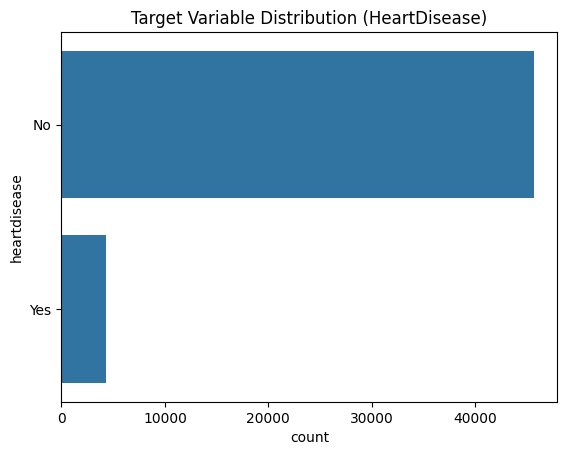


Summary Statistics for Numerical Features:
                bmi  physicalhealth  mentalhealth    sleeptime
count  50000.000000    50000.000000  50000.000000  50000.00000
mean      27.971388        3.539560      3.984260      7.12938
std        6.239799        8.094921      7.979439      1.49613
min       12.400000        0.000000      0.000000      1.00000
25%       23.710000        0.000000      0.000000      6.00000
50%       26.960000        0.000000      0.000000      7.00000
75%       31.010000        2.000000      4.000000      8.00000
max       87.050000       30.000000     30.000000     24.00000


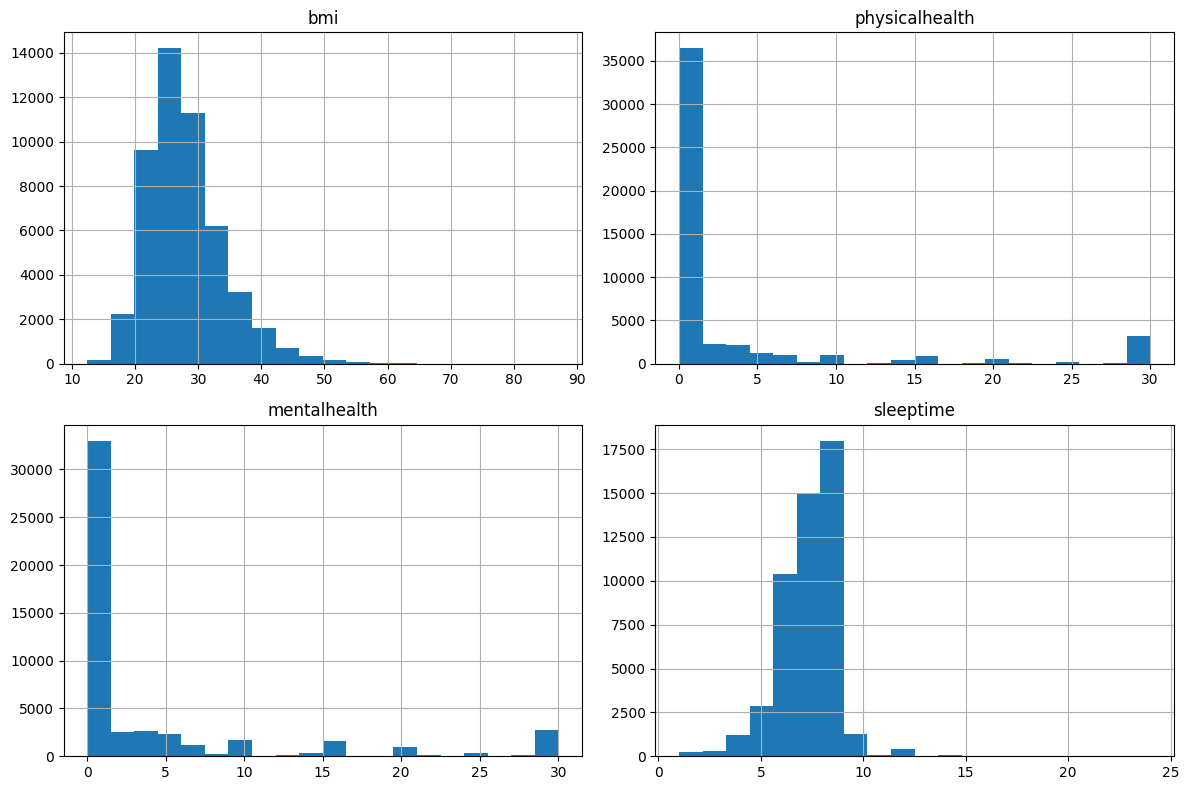

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data['heartdisease'])
plt.title('Target Variable Distribution (HeartDisease)')
plt.show()

numerical_cols = ['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime']
print("\nSummary Statistics for Numerical Features:")
print(data[numerical_cols].describe())

data[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

Bivariate Analysis

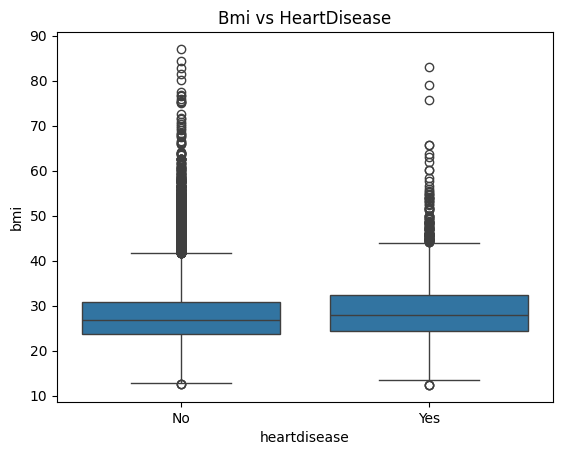

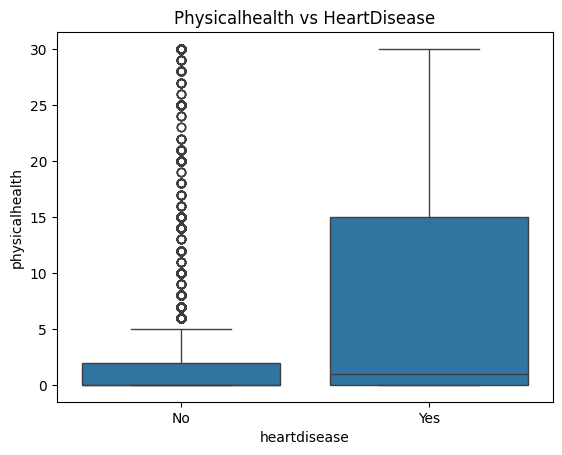

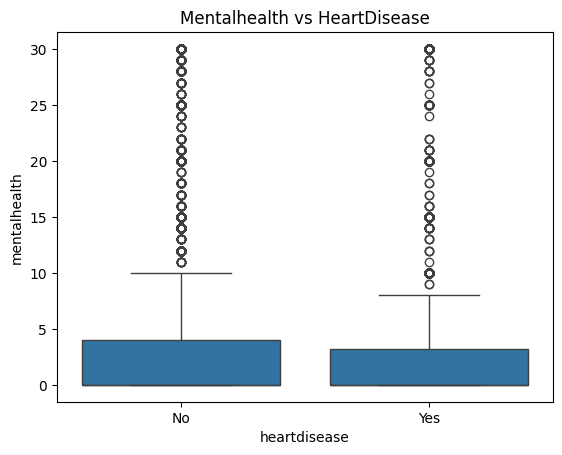

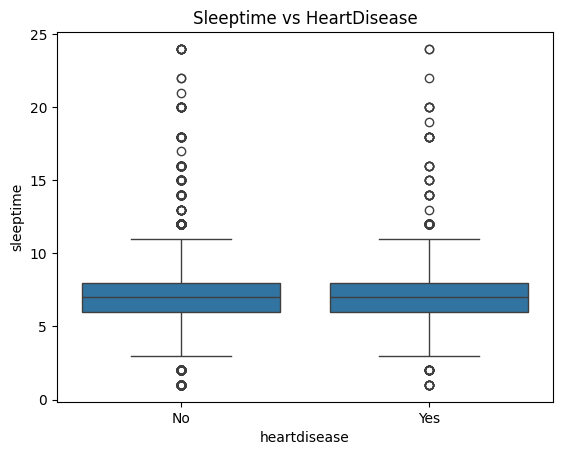

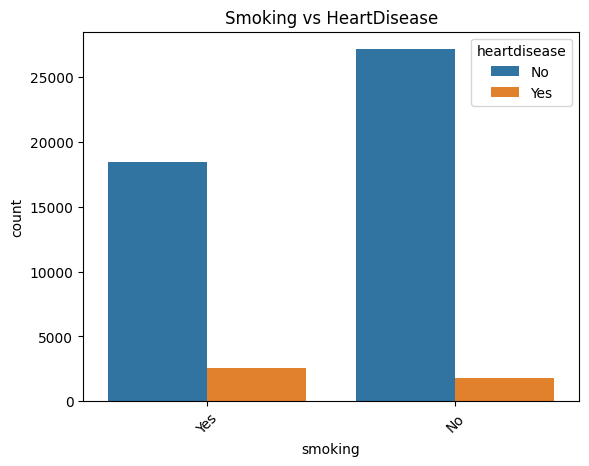

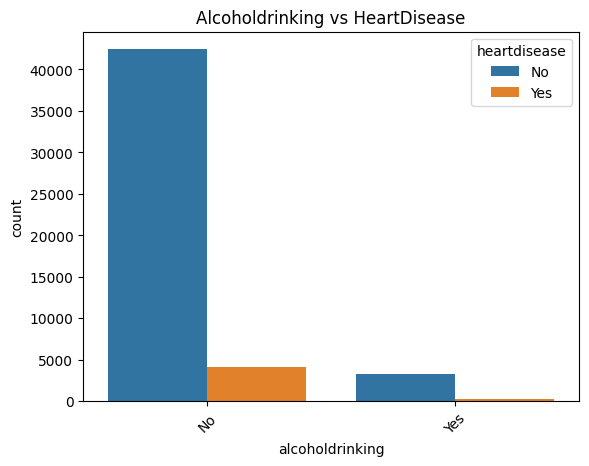

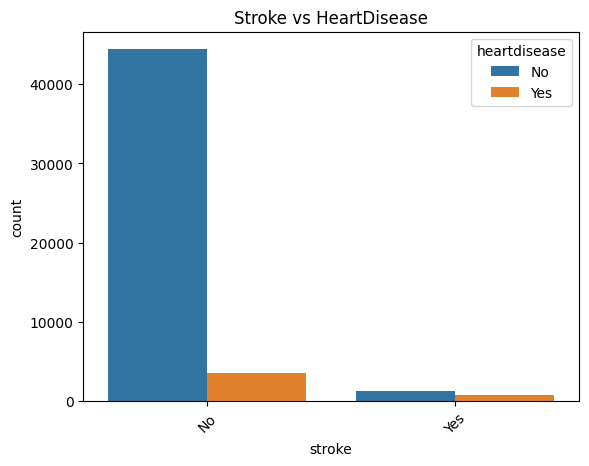

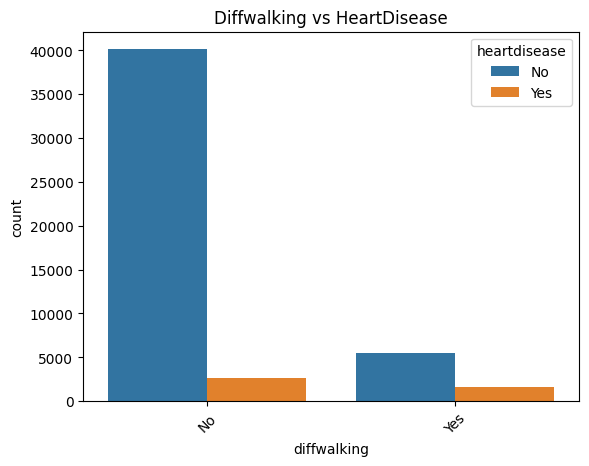

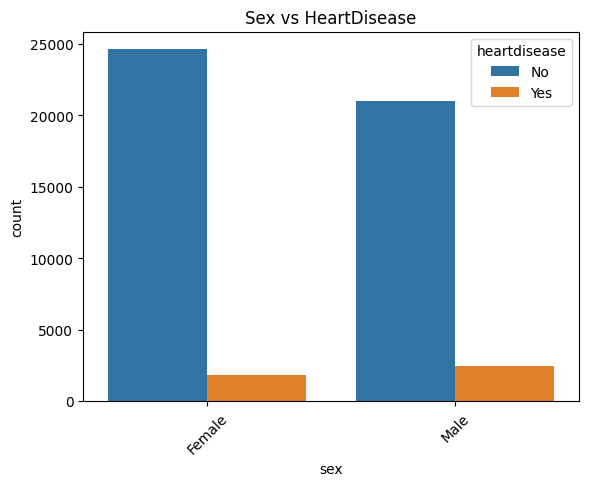

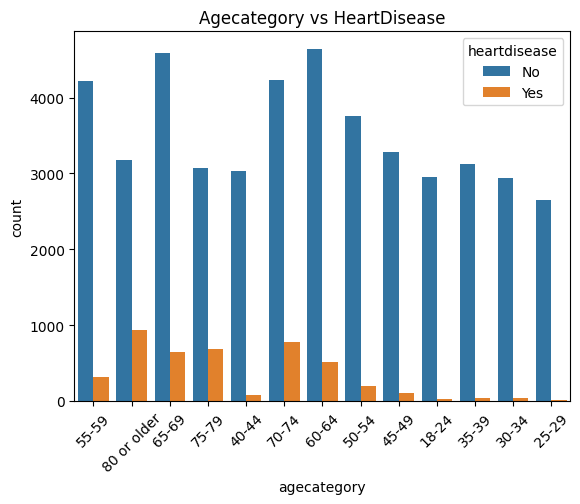

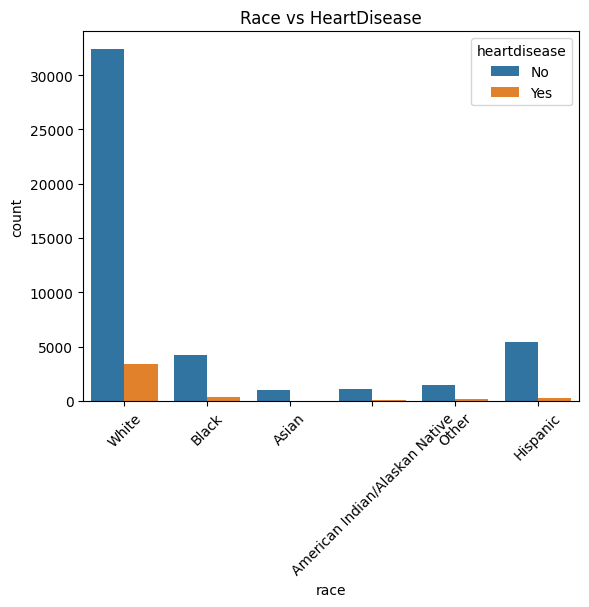

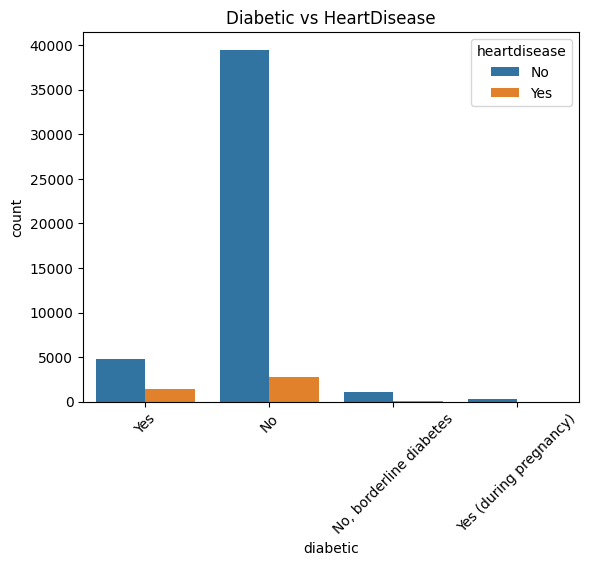

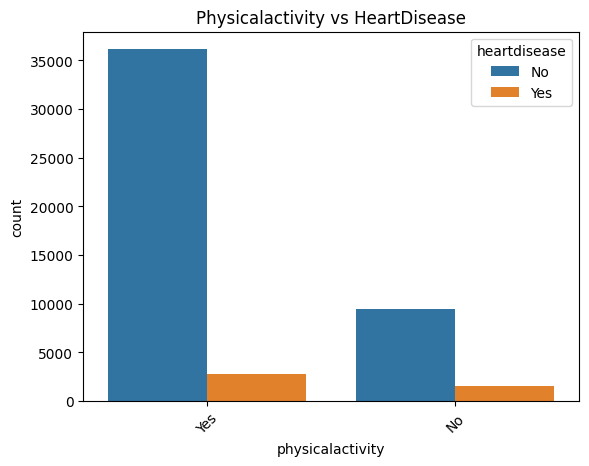

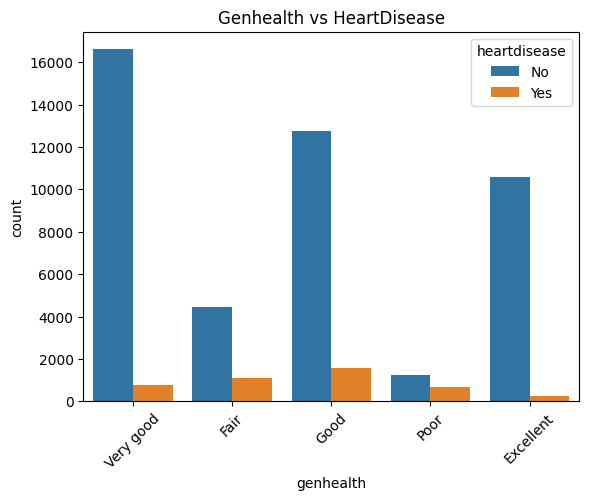

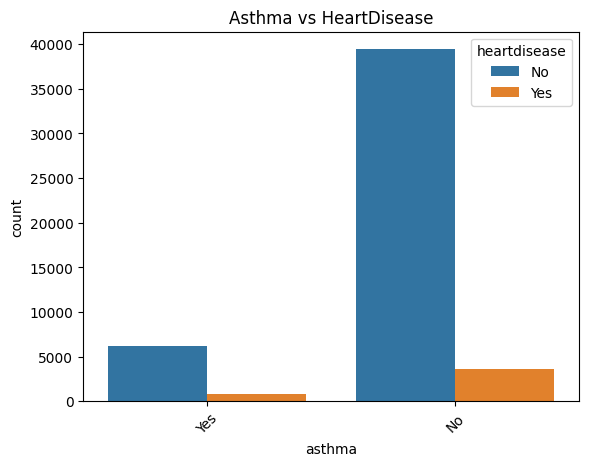

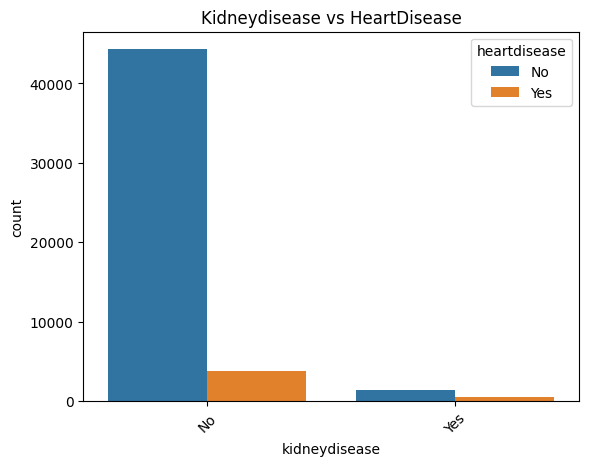

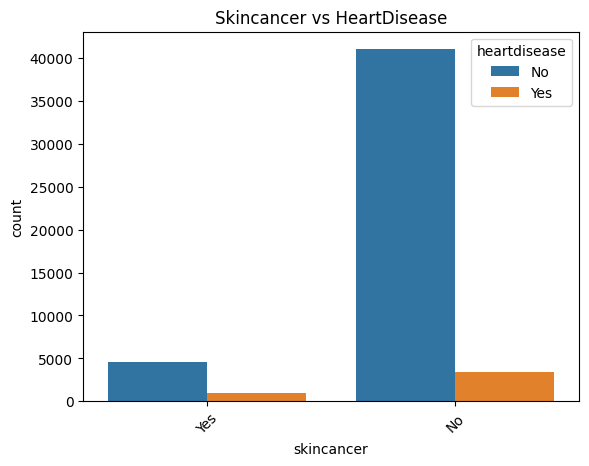

In [5]:
for col in numerical_cols:
    sns.boxplot(x='heartdisease', y=col, data=data)
    plt.title(f'{col.capitalize()} vs HeartDisease')
    plt.show()

categorical_cols = ['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'sex',
                    'agecategory', 'race', 'diabetic', 'physicalactivity',
                    'genhealth', 'asthma', 'kidneydisease', 'skincancer']

for col in categorical_cols:
    sns.countplot(x=col, hue='heartdisease', data=data)
    plt.title(f'{col.capitalize()} vs HeartDisease')
    plt.xticks(rotation=45)
    plt.show()

Multivariate Analysis

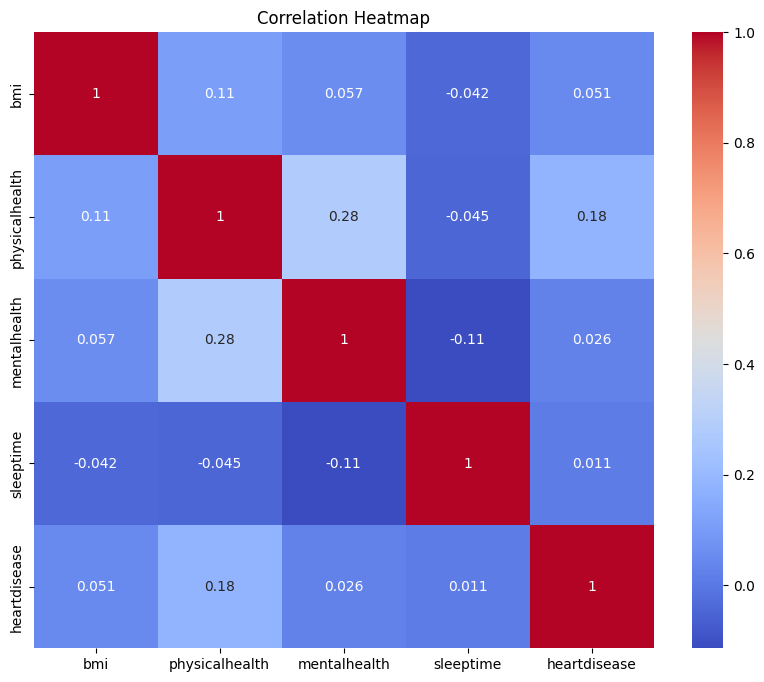

In [6]:
import numpy as np
data['heartdisease'] = data['heartdisease'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(10, 8))
correlation = data[numerical_cols + ['heartdisease']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Data Preprocessing with ColumnTransformer


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

Model Implementation with KNN Pipeline


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

Train the KNN *Model*

In [9]:
knn_pipeline.fit(X_train, y_train)
print('heartdisease' in numerical_cols)
print('heartdisease' in categorical_cols)
print(data['heartdisease'].unique())






False
False
[0 1]


Covert Target to numberical values

In [10]:
data['heartdisease'] = data['heartdisease'].map({'No': 0, 'Yes': 1})

print(data['heartdisease'].unique())

[nan]


Evaluate Model and performance Evaluation

In [11]:
#y_pred = knn_pipeline.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred, pos_label='Yes')
#recall = recall_score(y_test, y_pred, pos_label='Yes')
#f1 = f1_score(y_test, y_pred, pos_label='Yes')

#print(f"Accuracy: {accuracy:.2f}")
#print(f"Precision: {precision:.2f}")
#print(f"Recall: {recall:.2f}")
#print(f"F1 Score: {f1:.2f}")

Confusion Matrix Visualization


In [12]:
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.show()

**Accuracy Comparison**
First convert the Accuracies into Percentages

**Implemented High Accuracy with XGBoost feature selection with ANOVA:** 92

**Base Paper Accuracy:** 97

**Final Conclusion**

Code & Database of base paper was not available wo we choose public dataset related to this paper , to predict heart disesase on basis of certain paramteres.

we write our own code to conclude restults with feature selection ANOVA



Integrate MLflow

In [13]:
!pip install mlflow


In [14]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Define full pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Identify columns
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessors
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])






In [17]:
def train_and_log_model(model, model_name, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=model_name):
        # Log the model name
        mlflow.log_param("model_type", model_name)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Log metrics
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)

        # Log the model itself
        signature = infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, "model", signature=signature)

        print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

y_train = y_train.replace({'No': 0, 'Yes': 1}).astype(int)
y_test = y_test.replace({'No': 0, 'Yes': 1}).astype(int)


models = [
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC(probability=True, kernel='rbf', C=1, gamma='scale')),
    ("Voting Classifier", VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier(n_estimators=100)),
            ('gnb', GaussianNB())
        ], voting='soft')),
    ("XGBoost", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100)),
    ("Bagging", BaggingClassifier(n_estimators=50)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)) ,
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=7)),
    ("Logistic Regression", LogisticRegression(max_iter=1000))
]




def find_non_numeric_columns(df):
    non_numeric_cols = []
    for col in df.columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            non_numeric_cols.append(col)
    return non_numeric_cols

non_numeric_columns = find_non_numeric_columns(X_train)

if non_numeric_columns:
    print("Non-numeric columns found in X_train:")
    print(non_numeric_columns)
    print("\nSample values:")
    for col in non_numeric_columns:
        print(f"- {col}: {X_train[col].unique()[:5]}")
else:
    print("All columns in X_train are numeric.")


binary_cols = ['smoking', 'alcoholdrinking', 'stroke', 'diffwalking',
               'physicalactivity', 'asthma', 'kidneydisease', 'skincancer']

X_train[binary_cols] = X_train[binary_cols].replace({'Yes': 1, 'No': 0})
X_test[binary_cols] = X_test[binary_cols].replace({'Yes': 1, 'No': 0})

X_train['sex'] = X_train['sex'].replace({'Male': 1, 'Female': 0})
X_test['sex'] = X_test['sex'].replace({'Male': 1, 'Female': 0})

from sklearn.preprocessing import LabelEncoder

multi_cat_cols = ['agecategory', 'race', 'diabetic', 'genhealth']

le = LabelEncoder()
for col in multi_cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])



from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=3)

# Transform the datasets
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected features by ANOVA F-test:")
print(selected_features)


for model_name, model in models:
    train_and_log_model(model, model_name, X_train_selected, y_train, X_test_selected, y_test)
# Feature scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'F-Score': selector.scores_,
    'p-Value': selector.pvalues_
})

# Sort by F-Score
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)
print(feature_scores)


for model_name, model in models:
    train_and_log_model(model, model_name, X_train_selected, y_train, X_test_selected, y_test)



<ipython-input-18-6b85be853e1f>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'No': 0, 'Yes': 1}).astype(int)
<ipython-input-18-6b85be853e1f>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'No': 0, 'Yes': 1}).astype(int)


Non-numeric columns found in X_train:
['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'sex', 'agecategory', 'race', 'diabetic', 'physicalactivity', 'genhealth', 'asthma', 'kidneydisease', 'skincancer']

Sample values:
- smoking: ['Yes' 'No']
- alcoholdrinking: ['No' 'Yes']
- stroke: ['No' 'Yes']
- diffwalking: ['No' 'Yes']
- sex: ['Male' 'Female']
- agecategory: ['30-34' '70-74' '25-29' '65-69' '35-39']
- race: ['White' 'Asian' 'Black' 'Hispanic' 'Other']
- diabetic: ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
- physicalactivity: ['Yes' 'No']
- genhealth: ['Excellent' 'Very good' 'Good' 'Poor' 'Fair']
- asthma: ['Yes' 'No']
- kidneydisease: ['No' 'Yes']
- skincancer: ['No' 'Yes']


<ipython-input-18-6b85be853e1f>:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[binary_cols] = X_train[binary_cols].replace({'Yes': 1, 'No': 0})
<ipython-input-18-6b85be853e1f>:59: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[binary_cols] = X_test[binary_cols].replace({'Yes': 1, 'No': 0})
<ipython-input-18-6b85be853e1f>:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

Selected features by ANOVA F-test:
Index(['stroke', 'diffwalking', 'agecategory'], dtype='object')
Naive Bayes - Accuracy: 0.8774, Precision: 0.3080, Recall: 0.3281, F1: 0.3178


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM - Accuracy: 0.9130, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Voting Classifier - Accuracy: 0.9082, Precision: 0.4194, Recall: 0.1434, F1: 0.2137
XGBoost - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
AdaBoost - Accuracy: 0.9132, Precision: 0.5120, Recall: 0.0588, F1: 0.1055
Bagging - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Decision Tree - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
KNN - Accuracy: 0.9017, Precision: 0.2883, Recall: 0.0882, F1: 0.1351
Random Forest - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Logistic Regression - Accuracy: 0.9131, Precision: 0.5096, Recall: 0.0487, F1: 0.0889
             Feature      F-Score        p-Value
8        agecategory  2233.290638   0.000000e+00
3             stroke  1686.622604   0.000000e+00
6        diffwalking  1682.034937   0.000000e+00
10          diabetic  1272.627663  3.934172e-274
4     physicalhealth  1199.087141  1.166688e-258
15     kidney

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM - Accuracy: 0.9130, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Voting Classifier - Accuracy: 0.9080, Precision: 0.4162, Recall: 0.1415, F1: 0.2112
XGBoost - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
AdaBoost - Accuracy: 0.9132, Precision: 0.5120, Recall: 0.0588, F1: 0.1055
Bagging - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Decision Tree - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
KNN - Accuracy: 0.9017, Precision: 0.2883, Recall: 0.0882, F1: 0.1351
Random Forest - Accuracy: 0.9128, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Logistic Regression - Accuracy: 0.9131, Precision: 0.5096, Recall: 0.0487, F1: 0.0889


Download Locally to view results

In [19]:
!zip -r mlruns.zip /content/mlruns
from google.colab import files
files.download("mlruns.zip")

  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/.trash/ (stored 0%)
  adding: content/mlruns/0/ (stored 0%)
  adding: content/mlruns/0/meta.yaml (deflated 25%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/ (stored 0%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/meta.yaml (deflated 43%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/params/ (stored 0%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/params/model_type (stored 0%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/artifacts/ (stored 0%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/artifacts/model/ (stored 0%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/artifacts/model/requirements.txt (deflated 20%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/artifacts/model/model.pkl (deflated 65%)
  adding: content/mlruns/0/7c3e80f016b1452aa9a4e2f71fcacc94/artifacts/model/python_env.yaml (deflated 17%)
  adding:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



```
# This is formatted as code
```

After extracting it , I have install python envirnoment on my local machine


# 1. Create a virtual environment (only once)
python3 -m venv venv

# 2. Activate it
source venv/bin/activate

# 3. Now install MLflow (no errors expected)
pip install mlflow

Step1: pip install mlflow

Step2: mlflow ui --backend-store-uri mylocalurl

Step3:open http://127.0.0.1:5000
to view results


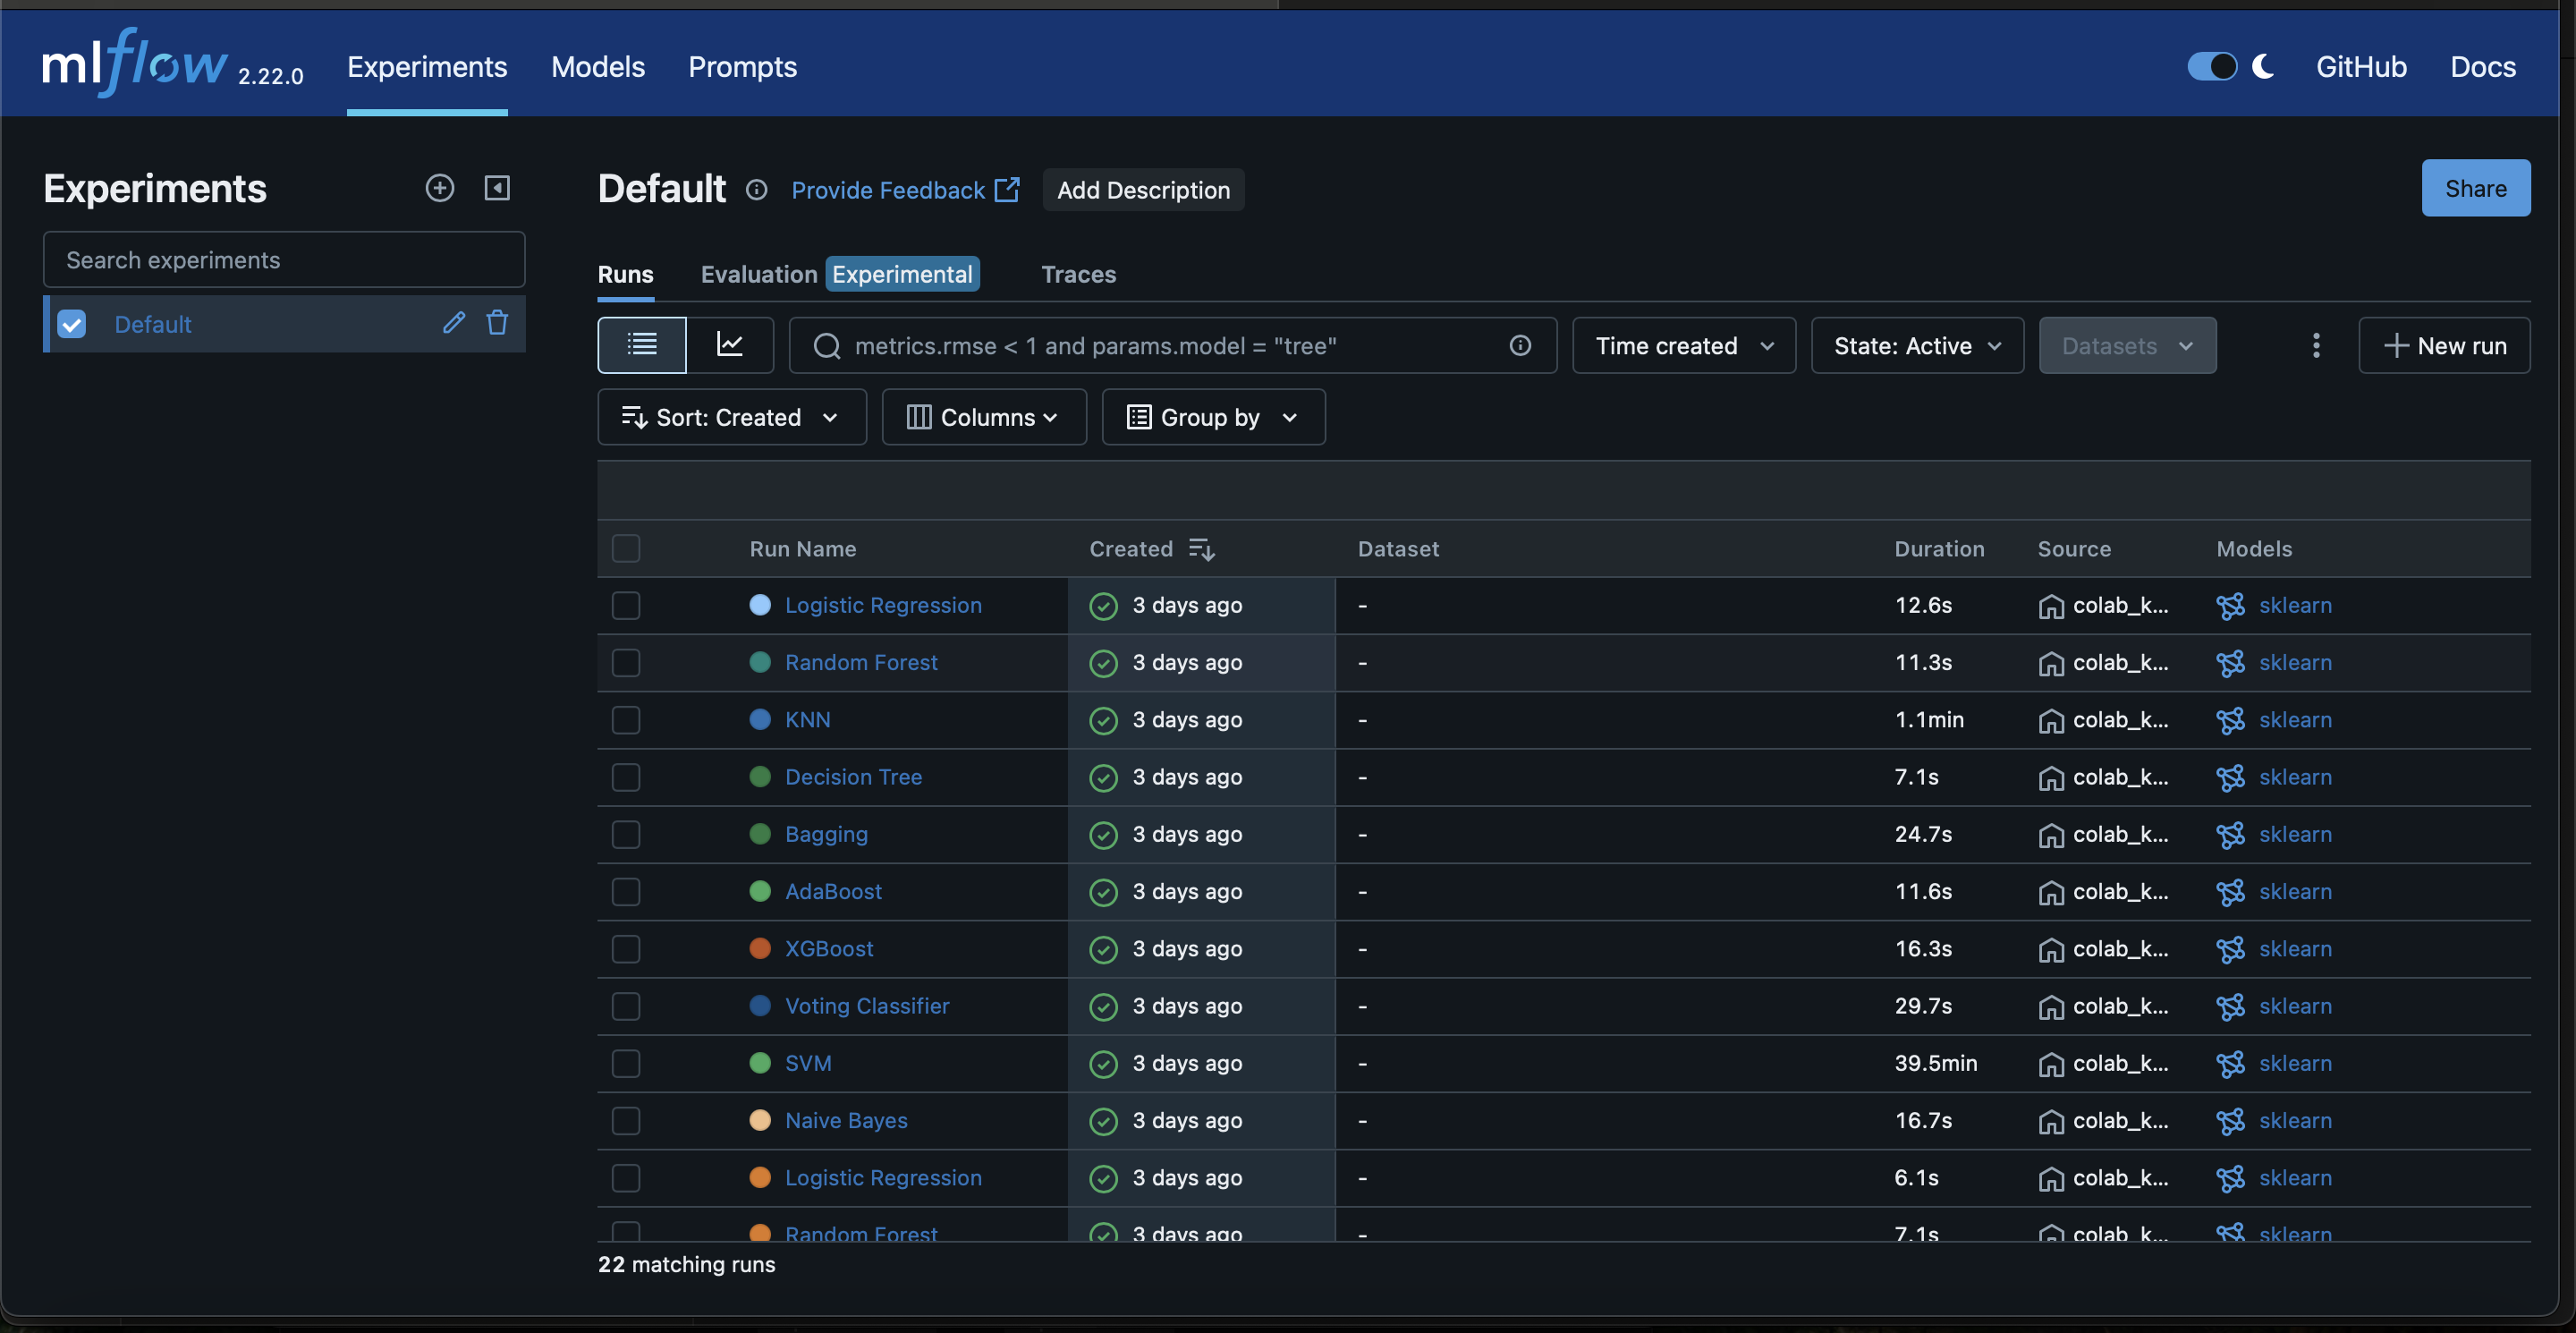

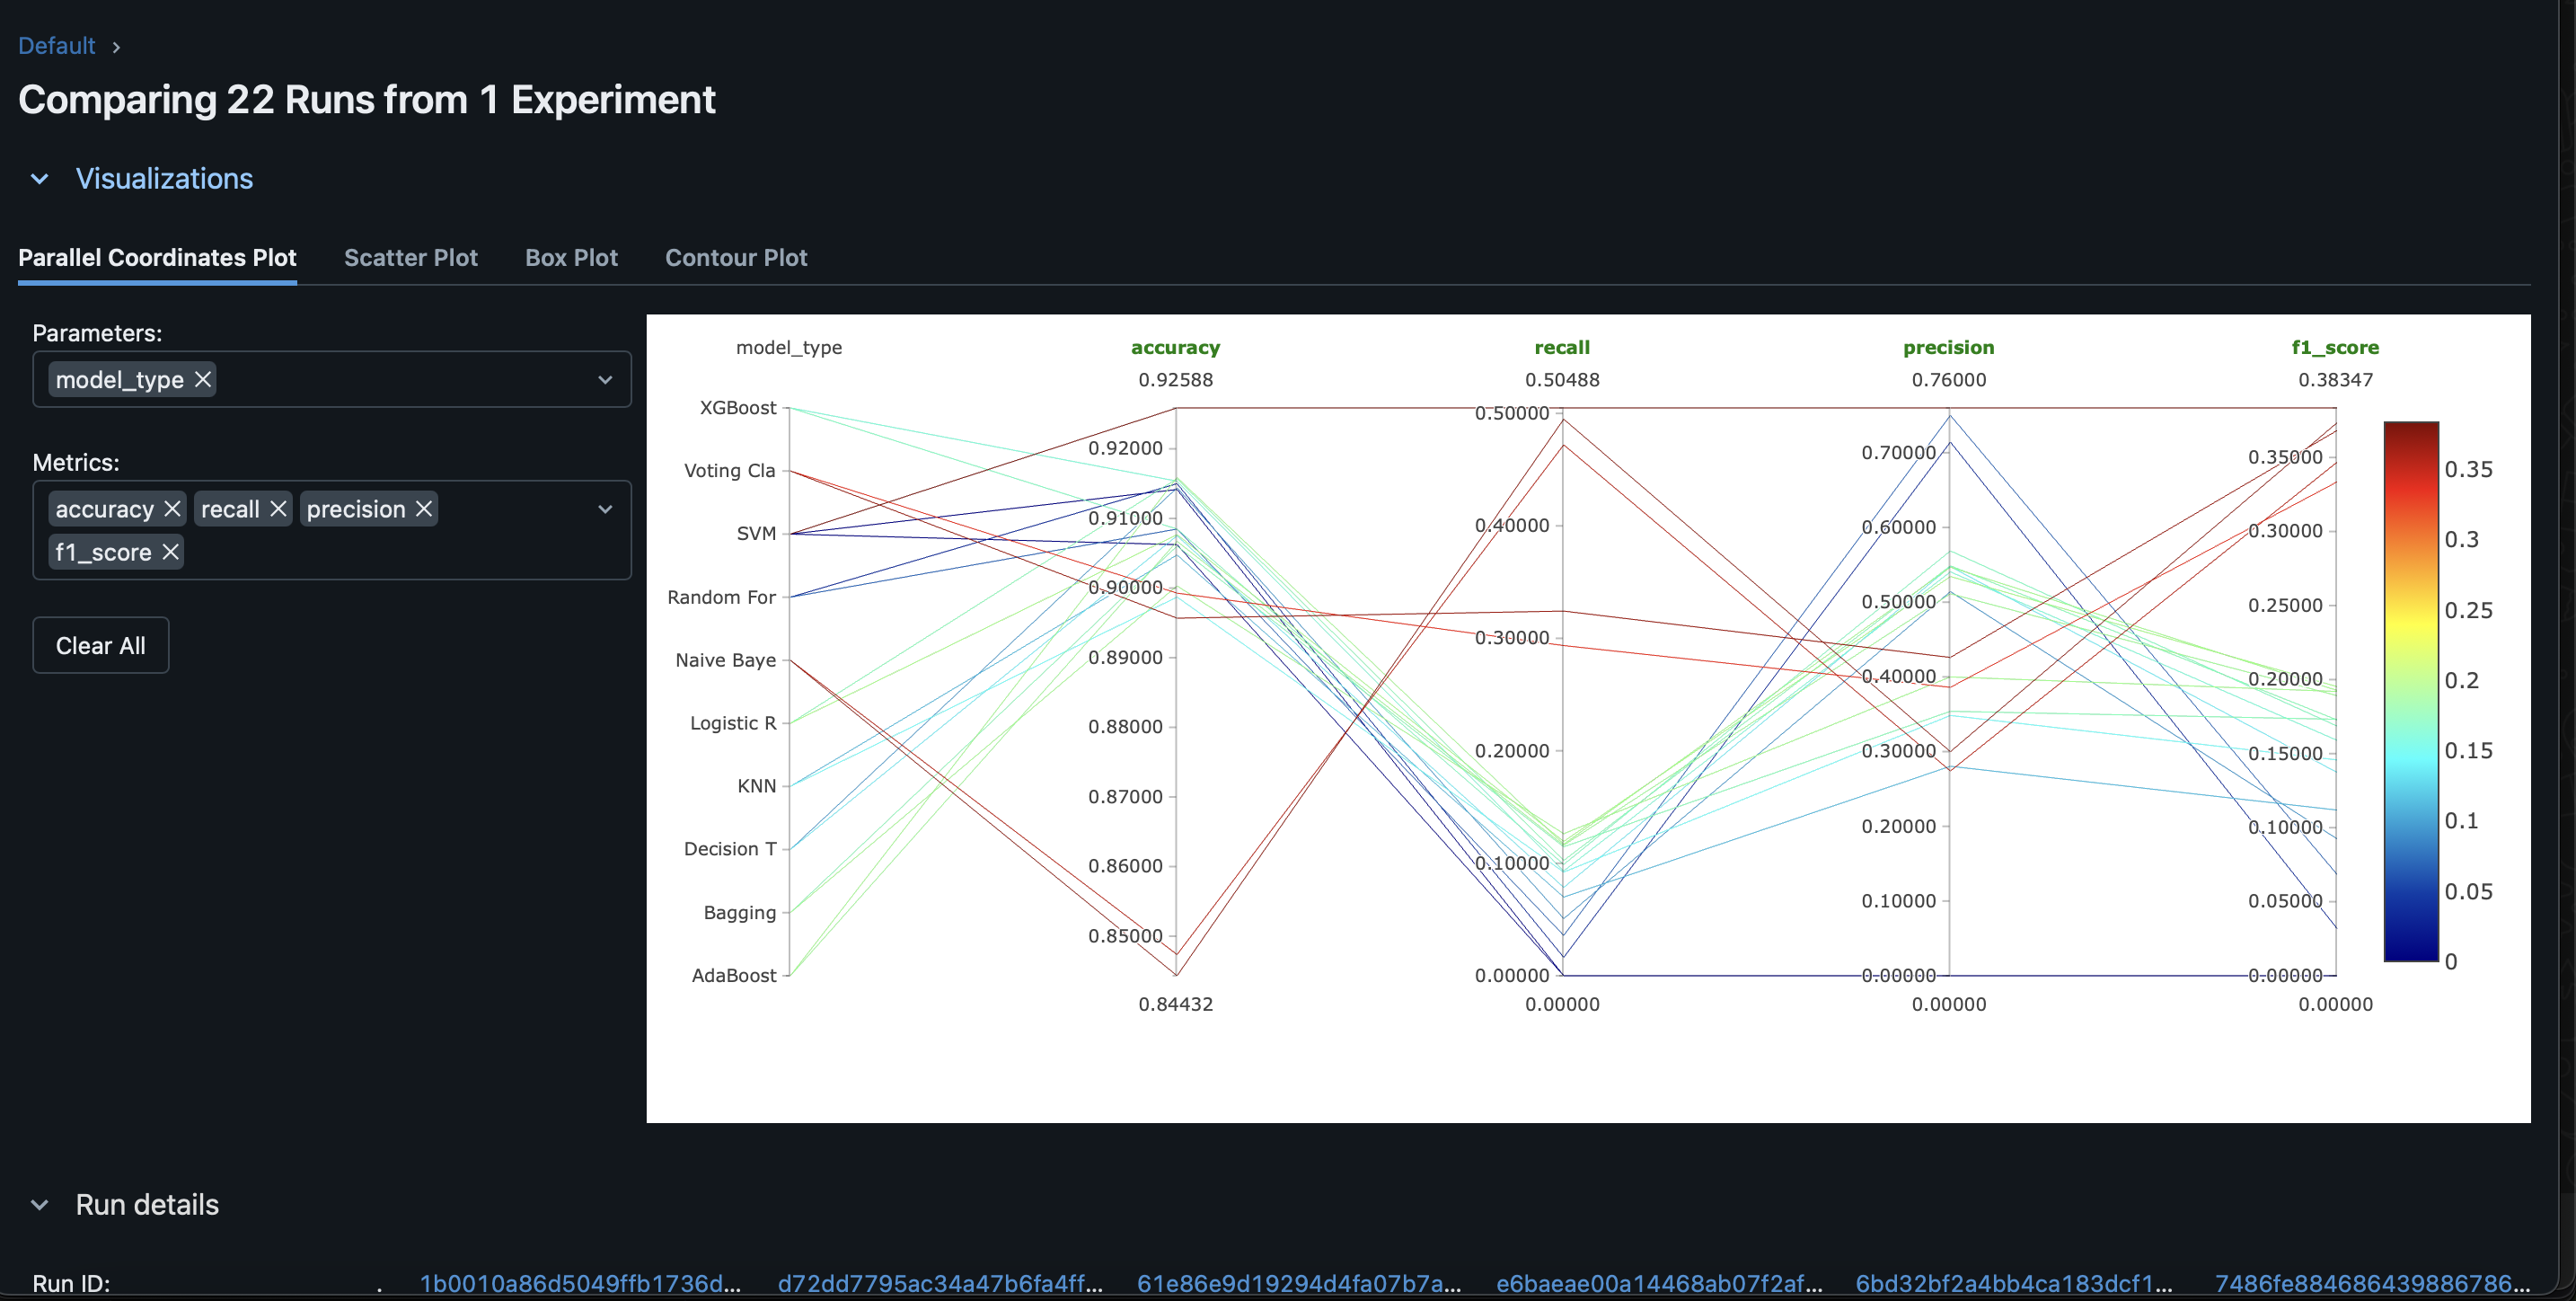